<a href="https://colab.research.google.com/github/naga-dheeraj-p/Machine_LEARNING_projects/blob/main/Customer_Churn_Predt_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, RepeatedStratifiedKFold

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score


In [3]:
data=pd.read_csv('/content/sample_data/Churn_Modelling.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data['CustomerId']=id
data.drop(['RowNumber','CustomerId'],axis=1,inplace=True)

In [5]:
data.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
category_data=data.select_dtypes(exclude=[np.number])
category_data

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


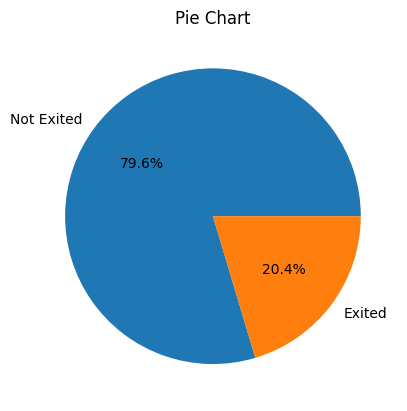

In [8]:
labels = ['Not Exited', 'Exited']
counts = data['Exited'].value_counts()

fig, ax = plt.subplots()
ax.set_title('Pie Chart')
ax.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

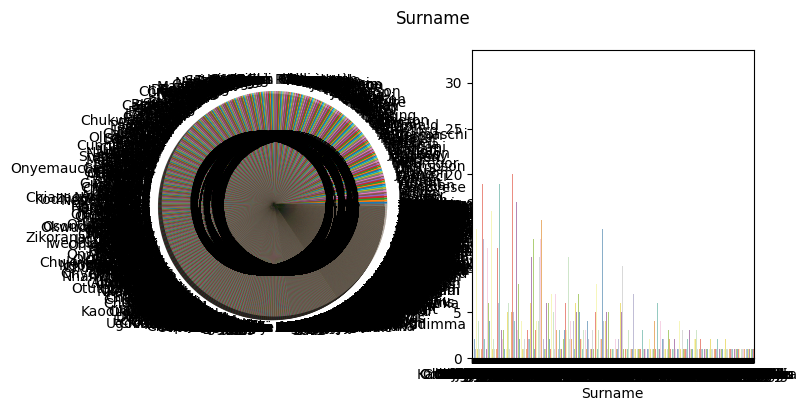

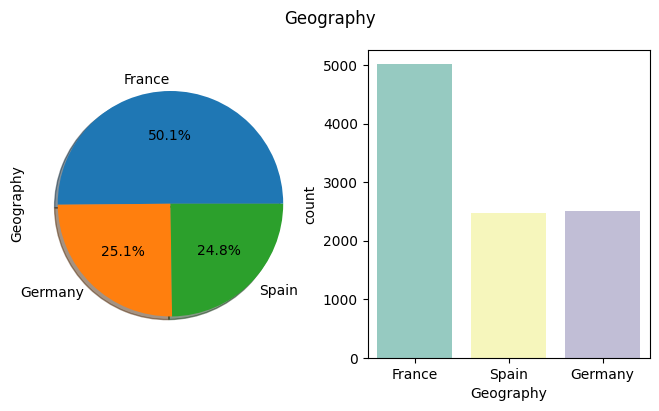

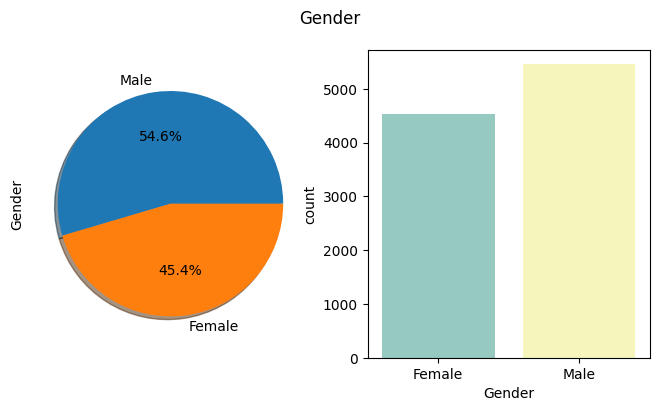

In [9]:
for column in category_data:
    f,ax=plt.subplots(1,2,figsize=(8,4))
    data[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)

    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=data,ax=ax[1],palette='Set3', hue=column)
    plt.suptitle(f'{column}')
    plt.show()

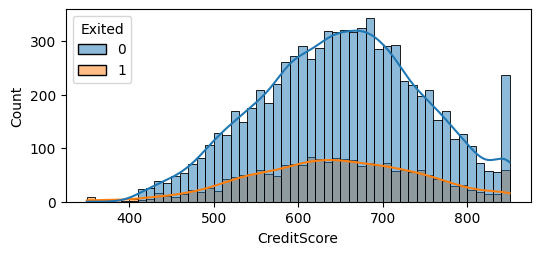

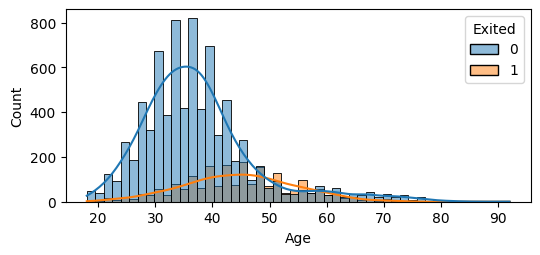

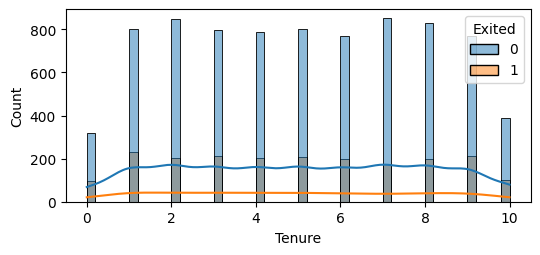

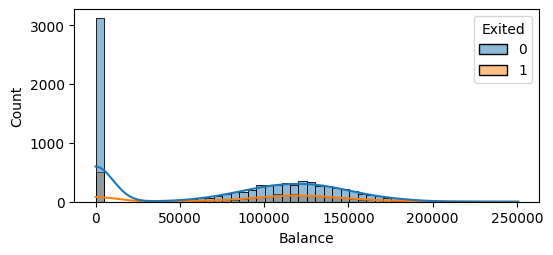

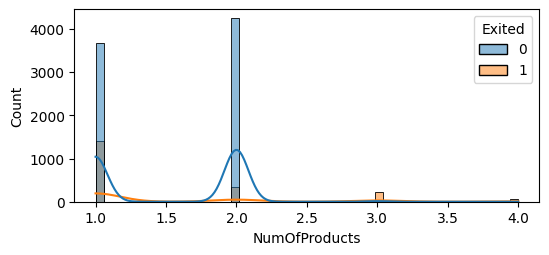

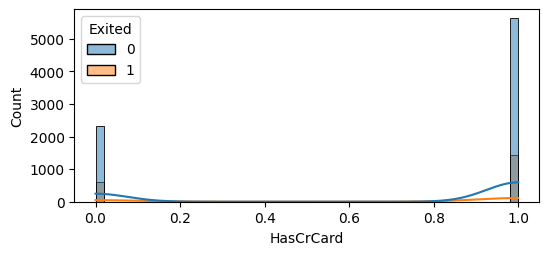

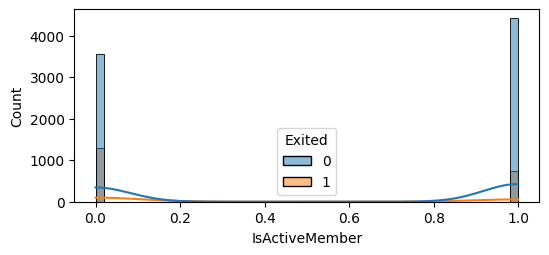

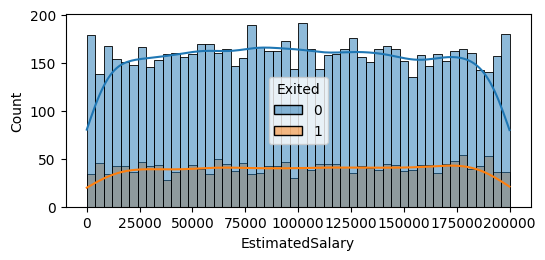

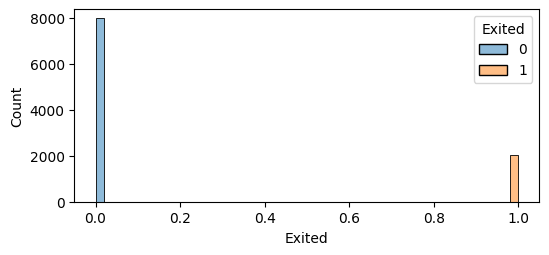

In [10]:
import pandas as pd
pd.set_option('mode.use_inf_as_na', True)

numeric_data=data.select_dtypes(include=[np.number])
for column in numeric_data:
    fig, ax = plt.subplots(figsize=(6,2.5))
    fig = sns.histplot(data=data, x=column, hue="Exited", bins=50, kde=True)
    plt.show()

Correlation Analysis

Text(0.5, 1.0, 'Correlation HeatMap')

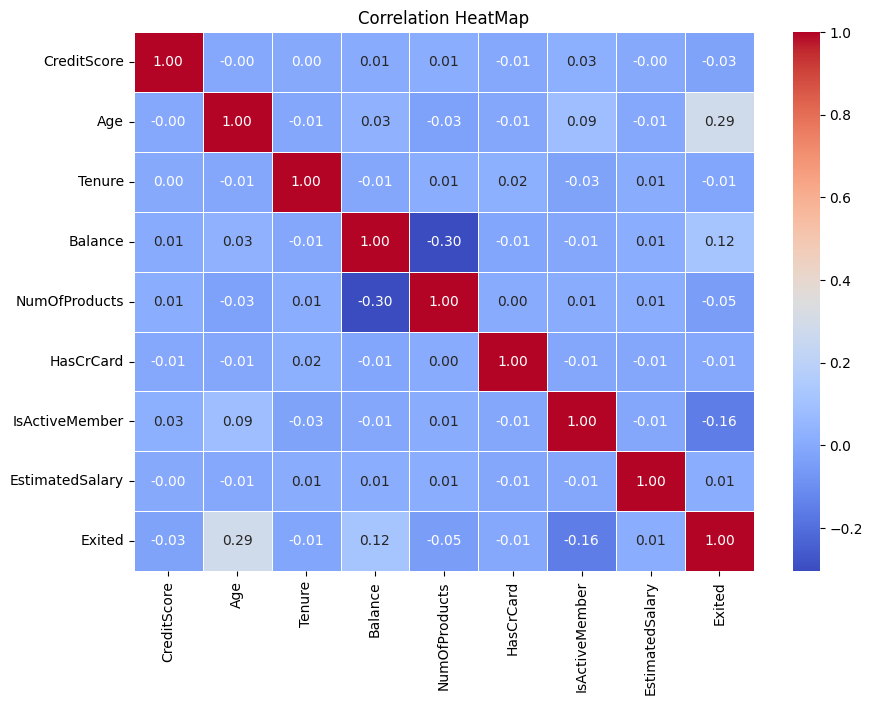

In [11]:
correlation=numeric_data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation HeatMap')

In [12]:
label_encoding=LabelEncoder()
data["Geography"] = label_encoding.fit_transform(data['Geography'])
data["Gender"] = label_encoding.fit_transform(data['Gender'])
data.drop(['Surname'],axis=1,inplace=True)
data.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0


In [15]:
X=data.drop('Exited',axis=1)
Y=data.Exited
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=30)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA(0.8)
X_train_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for training data:", explained_variance_ratio)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)

pca = PCA(0.8)
X_test_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for testing data:", explained_variance_ratio)
X

Explained variance ratio for training data: [0.13210112 0.1103607  0.10319731 0.10212337 0.10097678 0.09952771
 0.09808509 0.09746625]
Explained variance ratio for testing data: [0.13356432 0.1113445  0.10539077 0.10196068 0.10026811 0.09860461
 0.09648373 0.09422732]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [17]:
lgbm = LGBMClassifier(**{'objective': 'binary','boosting_type': 'gbdt','metric':"auc",
                         'random_state': 42,'colsample_bytree': 0.56,'subsample': 0.35,
                         'learning_rate': 0.05,'max_depth': 8,'n_estimators': 1000,
                         'num_leaves': 140,'reg_alpha': 0.14,'reg_lambda': 0.85,'verbosity': -1,})

In [18]:
xgb=XGBClassifier(**{'objective':'binary:logistic','eval_metric': "auc",'random_state': 42,'colsample_bytree': 0.25,
                      'learning_rate': 0.07,'max_depth': 8,'n_estimators': 800,'reg_alpha': 0.09,
                      'reg_lambda': 0.70,'min_child_weight': 22,'verbosity': 0,})

In [19]:
cat= CatBoostClassifier(**{'iterations': 10000,'objective': 'Logloss','eval_metric': "AUC",
                             'early_stopping_rounds' : 1000,'bagging_temperature': 0.1,'colsample_bylevel': 0.88,
                             'iterations': 1000,'learning_rate': 0.065,'max_depth': 7,'l2_leaf_reg': 1,
                             'min_data_in_leaf': 25,'random_strength': 0.1, 'max_bin': 100,'verbose': 0,})

HERE I JAVE RUN EACH BOOSTER SEPARATELY & THEN ALLOT GREATER WEIGHTS FOR BETTER PERFORMING GRADIENT BOOSTING CLASSIFIER

In [20]:
vote = VotingClassifier(estimators=[('lgbm', lgbm), ('xgb', xgb), ('cat', cat)], voting='soft', weights=[1,1,1])

In [21]:
submission_predictions = []

In [22]:
kf = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=23)
aucs = []
i = 1

In [23]:
for train_index, test_index in kf.split(X,Y):
    print(f"Fold {i}:")
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[test_index]
    Y_train_kf, Y_val_kf = Y.iloc[train_index], Y.iloc[test_index]
    vote.fit(X_train_kf, Y_train_kf)
    Y_pred_val = vote.predict_proba(X_val_kf)[:, 1]
    auc_val = roc_auc_score(Y_val_kf, Y_pred_val)
    print(f"Validation ROC AUC Score: {auc_val}")
    aucs.append(auc_val)
    Y_pred_test = vote.predict_proba(X)[:, 1]
    submission_predictions.append(Y_pred_test)
    i+=1

Fold 1:
Validation ROC AUC Score: 0.8554172824908858
Fold 2:
Validation ROC AUC Score: 0.8511632404760519
Fold 3:
Validation ROC AUC Score: 0.8680526021319908
Fold 4:
Validation ROC AUC Score: 0.8423228694153159
Fold 5:
Validation ROC AUC Score: 0.8586727756429205
Fold 6:
Validation ROC AUC Score: 0.856921964162898
Fold 7:
Validation ROC AUC Score: 0.8464889645842442
Fold 8:
Validation ROC AUC Score: 0.849077232615532


In [24]:
avg_submission = pd.DataFrame(submission_predictions).mean(axis=0)
avg_submission

0       0.503012
1       0.100904
2       0.938277
3       0.046525
4       0.042255
          ...   
9995    0.011596
9996    0.026195
9997    0.429293
9998    0.378351
9999    0.093223
Length: 10000, dtype: float64

In [ ]:
sample = pd.DataFrame({'submission_predictions': submission_predictions}, index=id)